# <font color='black'>Deep Learning for Image Processing</font>

---
<figure>
<center>
<img src='https://drive.google.com/uc?id=1u-iZKwzco1L8a3gFFLMXbSOU_DsdNZqo' width="300" align="center" />
</center>
</figure>


> Year: **2022**

> Version: **1.1**

Welcome to Ma511- Deep Learning for Image Processing. In this first practical you will learn to create a Convolutional Neural Network using Keras.

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive/') #Simply to be able to save a figure. 
#You can comment these two lines if you work locally. 

In [ ]:
!pip install visualkeras #To be able to plot the model.

# Convolutional Neural Network for image classification

In this practical exercice a convolutional neural network  is built using keras. It is then trained to classify image digits from the MNIST database.

##  Set-up ##

First, let's run the cell below to import all the packages that you will need during this assignment. 

In [1]:
import tensorflow as tf
from keras.datasets import mnist as db
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import h5py
import visualkeras

# Magic used by the notebook to show figures inline
%matplotlib inline
# matplotlib default values
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading packages
%load_ext autoreload
%autoreload 2

/Users/leo/miniforge3/envs/ciri/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Class:  1


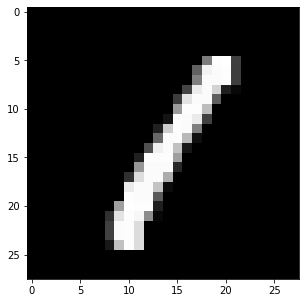

In [4]:
# Load and have a look at the data
(x, y), (x_test, y_test) = db.load_data()

# Visualize a single digit, with its class
index = 3
plt.imshow(x[index])
print("Class: ", y[index])

#Visualizing the shape of the data

In [5]:
print(x.shape)

(60000, 28, 28)


In [6]:
import keras 
from keras import backend as K
print(K.image_data_format())

nb_samples = x.shape[0]
val_nb = 5000  # samples in the valudation set
if val_nb > nb_samples:
    raise ValueError("More samples are need i")

img_rows, img_cols = x.shape[1:3]  # input image dimensions

x = x.reshape(nb_samples, img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

channels_last


#Visualizing the new shape of the data
This new shape allows to use several filters.

In [7]:
print(x.shape)
print(type(x[0,0,0,0]))

(60000, 28, 28, 1)
<class 'numpy.uint8'>


#Preparing the dataset

In [8]:
x = x.astype('float32')
x_test = x_test.astype('float32') #
x /= 255
x_test /= 255  #This will be useful later. 

x_val = x[:val_nb, ]
x_train = x[val_nb:, ]
y_val = y[:val_nb]
y_train = y[val_nb:]

print(x_train.shape, 'x train samples')
print(x_val.shape, 'x val samples')
print(x_test.shape, 'x test samples')
print(y_train.shape, 'y train samples')
print(y_val.shape, 'y val samples')
print(y_test.shape, 'y test samples')

# Convert class vectors to binary class vectors - One-hot representations
num_classes = max(y) + 1
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

(55000, 28, 28, 1) x train samples
(5000, 28, 28, 1) x val samples
(10000, 28, 28, 1) x test samples
(55000,) y train samples
(5000,) y val samples
(10000,) y test samples


# First part (14 points)

## Model definition

I the following you will use keras to create a convolutional neural network. The definition of the has to respect some constraints:

- The input shape has to match the size of each input sample. 
- The ouptput should be of size the number of classes(num_classes). Here it is 10.

Use `Sequential(), Conv2D(), MaxPooling2D(poolsize = ()), Flatten()` and `Dense()` from keras.layers to define a convolutional neural network. You can start using an architecture as the one defined in class.
Rememeber to start with a small model. You can later add more layers. 

In [9]:
filters_layer0 = 32
nb_dense = 128
### START CODE HERE ###
model = keras.Sequential([
    tf.keras.layers.Conv2D(filters_layer0, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])
### END CODE HERE ###


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-12-05 17:22:36.229267: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-05 17:22:36.229567: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
visualkeras.layered_view(model)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

## How many learnable parameters your model has? Try to start with less than 100 000 parameters to make training quick.

# Model training

Use the method `compile` to define the computational graph and the method `fit` to optimize the model for the  training set defined above and using the corresponding validation set.

You need to set the number of epochs_number to be small enough so that you can see the end of the training quickly and notice any error.


1.   Chose the loss function  (not binary_crossentropy!).
2.   Chose an optimizer, SGD or Adam for instance.
3.   Chose a metrics. 
4.   In the fit give training and validation data to have a validation cost/loss.



In [11]:
from keras.optimizers import SGD

### START CODE HERE ###

n_batch_size = 256
epochs_number = 30

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

output = model.fit(x=x_train, y=y_train, batch_size=n_batch_size, epochs=epochs_number, validation_data=(x_val, y_val))
### END CODE HERE ###

Epoch 1/30


2022-12-05 17:22:37.145486: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-05 17:22:37.484443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


215/215 [==============================] - ETA: 0s - loss: 0.6154 - accuracy: 0.8019

2022-12-05 17:22:43.125613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


215/215 [==============================] - 6s 26ms/step - loss: 0.6154 - accuracy: 0.8019 - val_loss: 0.1161 - val_accuracy: 0.9652
Epoch 2/30
215/215 [==============================] - 5s 22ms/step - loss: 0.1643 - accuracy: 0.9531 - val_loss: 0.0735 - val_accuracy: 0.9768
Epoch 3/30
215/215 [==============================] - 5s 22ms/step - loss: 0.1181 - accuracy: 0.9660 - val_loss: 0.0603 - val_accuracy: 0.9812
Epoch 4/30
215/215 [==============================] - 5s 25ms/step - loss: 0.0935 - accuracy: 0.9742 - val_loss: 0.0536 - val_accuracy: 0.9814
Epoch 5/30
215/215 [==============================] - 6s 30ms/step - loss: 0.0795 - accuracy: 0.9776 - val_loss: 0.0509 - val_accuracy: 0.9866
Epoch 6/30
215/215 [==============================] - 7s 31ms/step - loss: 0.0696 - accuracy: 0.9806 - val_loss: 0.0448 - val_accuracy: 0.9876
Epoch 7/30
215/215 [==============================] - 5s 25ms/step - loss: 0.0586 - accuracy: 0.9829 - val_loss: 0.0433 - val_accuracy: 0.9876
Epoch 8/30

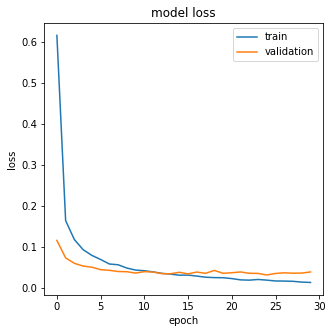

In [12]:
model.save('models/model_mnist.h5')
model = tf.keras.models.load_model('models/model_mnist.h5')
plt.plot(output.epoch, output.history['loss'])
plt.plot(output.epoch, output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig("training.pdf", dpi=50) #Saving the output in a pdf file. 
plt.show()

# Plotting activations of the neurons

Given a certain input is possible to show the activations of the neurons of the convolutional layers. Run the cells below to understand how to display the activation for the different layers of the CNN.

The chosen index is 35458
Class:  [9]


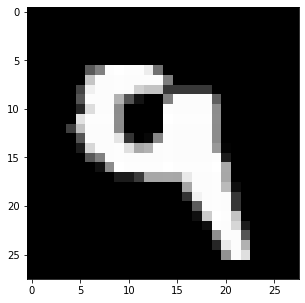

In [13]:
# Choose a random sample from the training data
index = np.random.randint(0, len(x_train))
print("The chosen index is",index)
sample = x_train[index]

plt.imshow(sample[:,:,0])
print("Class: ", np.arange(num_classes)[y_train[index].astype('bool')])

In [ ]:
from keras.models import Model

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(sample.reshape(1,28,28,1))
#Compute a prediction and the activation of each layer.

In [18]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*5,col_size*5))
    for row in range(0,row_size):
#        print(row)
        for col in range(0,col_size):
#           print("col=",col)
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap=plt.cm.bwr)
            ax[row][col].axis('off')
            activation_index += 1

#To adapt if your model is too small.

Activations values in the first convolutional layer


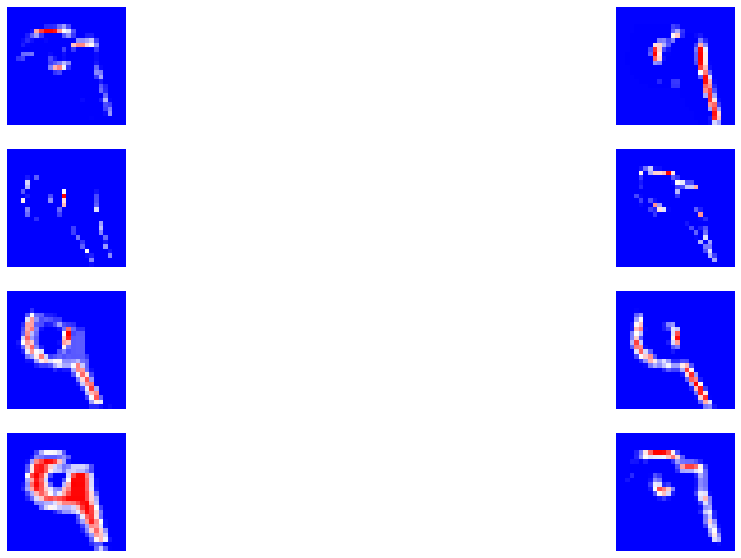

In [15]:
# display activation layer of the first filter
print('Activations values in the first convolutional layer')
display_activation(activations, 2, 4, 0)

#To adapt if your model is too small.

Activations values in the third convolutional layer


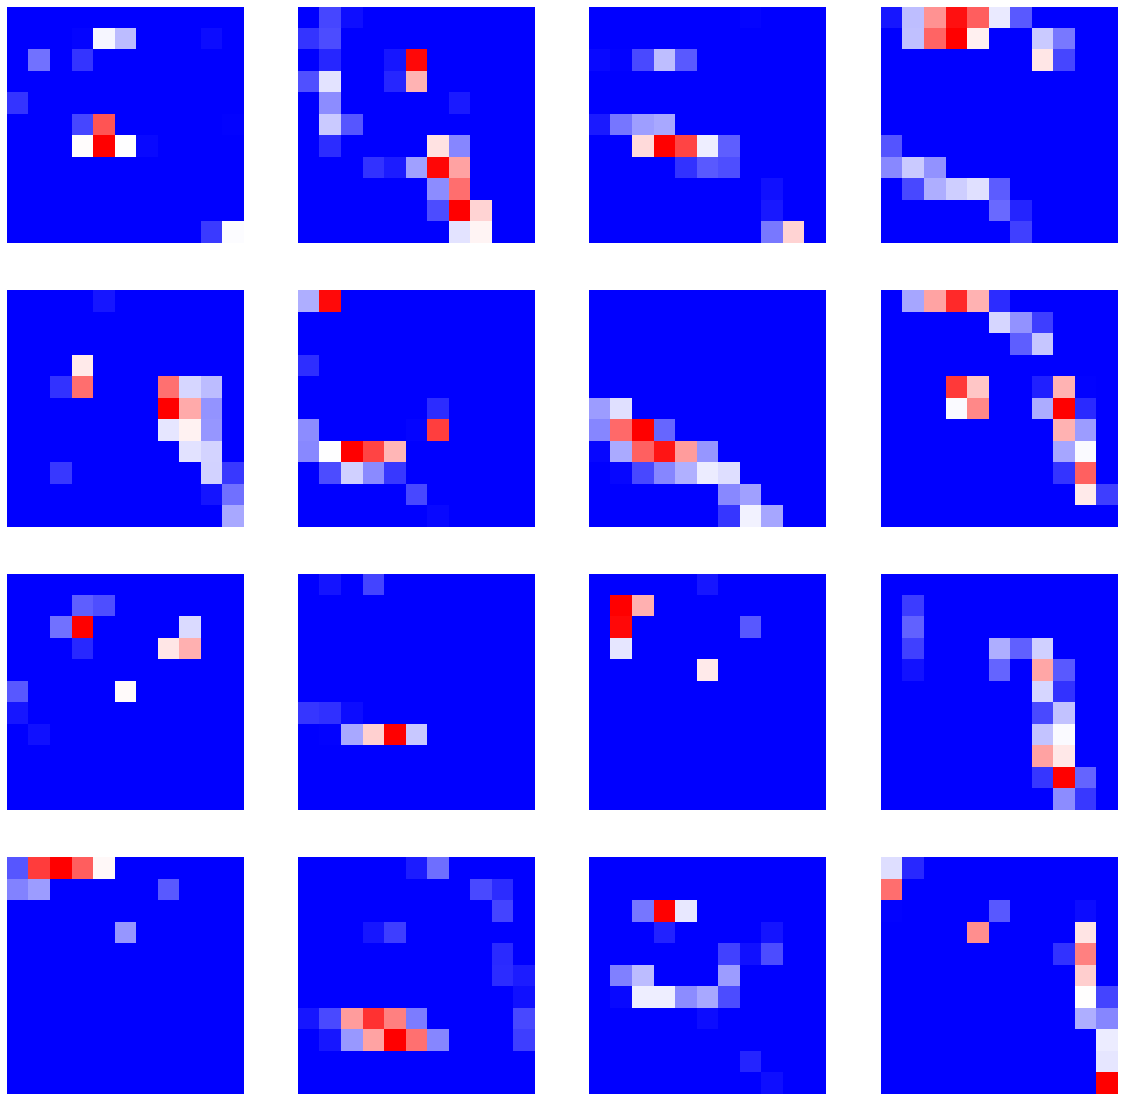

In [16]:
# display activation filter of the second filter
print('Activations values in the third convolutional layer')
display_activation(activations, 4, 4, 2)

# Testing

Test the model on the test set and evaluate its performance.

In [17]:
### START CODE HERE ###
model = tf.keras.models.load_model('models/model_mnist.h5')
n_batch_size=64
y_test_categ = tf.keras.utils.to_categorical(y_test, num_classes)
score = model.evaluate(x=x_test, y=y_test_categ, batch_size=n_batch_size)
### END CODE HERE ###
print('Test loss:', score[0])
print('Test accuracy:', score[1])

  9/157 [>.............................] - ETA: 2s - loss: 0.0083 - accuracy: 0.9983   

2022-12-05 17:25:07.799591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 1s 9ms/step - loss: 0.0364 - accuracy: 0.9911
Test loss: 0.03641562908887863
Test accuracy: 0.9911000728607178


## For each picture, compute the probabiliy of each class. 

In [18]:
### START CODE HERE ###
y_predict_proba =  model.predict(x_test)
### END CODE HERE ###

y_predict = np.argmax(y_predict_proba, 1)

diff = y_test != y_predict

 56/313 [====>.........................] - ETA: 0s

2022-12-05 17:25:09.448186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


In [19]:
#Format verification
print(y_predict_proba.shape)
print(y_test.shape)
print(y_predict.shape);print(y_predict[10:15])

(10000, 10)
(10000,)
(10000,)
[0 6 9 0 1]


You should obtain this: 

(10000, 10) 

(10000,)
(10000,)

And something like this with class prediction performed by the model. Yours will be different.

[7 2 1 0 4]

Correct label is:  5
Predicted label is:  3
Probabilities:  [8.95694541e-07 1.14532246e-03 2.18863960e-07 8.76936138e-01
 5.17941260e-07 1.21735066e-01 7.95736269e-05 1.51268310e-07
 7.24472338e-05 2.96490416e-05]


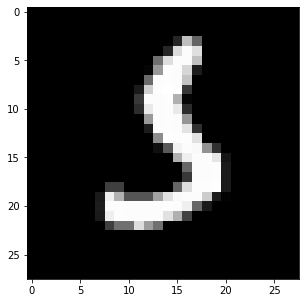

In [20]:
x_test_errors = x_test[diff]
y_test_errors = y_test[diff]
y_predict_errors = y_predict[diff]
y_predict_proba_errors = y_predict_proba[diff]

index = 0

print("Correct label is: ", y_test_errors[index])
print("Predicted label is: ", y_predict_errors[index])
print("Probabilities: ", y_predict_proba_errors[index])
plt.imshow(np.squeeze(x_test_errors[index]))

#Second part (6 points)

# Working with a more complex dataset, Fashon_mnist.

In the second part, you need to replace:

<code>from keras.datasets import mnist as db</code>

with:

<code>from keras.datasets import fashion_mnist as db</code>

in order to experiment with a more complex dataset. 
Use the following dictionary to transform number labels into meaningfull labels:

In [2]:
from keras.datasets import fashion_mnist as db_fashion

fashion_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
    }

print(fashion_dict[2])

Pullover


##Present the following results (the same 6 points as before).

1.   Create a train, validation and test set.
2.   Present the training and validation loss function for a training of at least 50 epochs and less than 200. Do you have overfitting? Do you have underfitting?
3.   Introduce regularization in your neural network. Either drop out or L2 regularization.
4.   Compute the accuray of your model on the test set.



In [3]:
num_classes = len(fashion_dict)
def train_test_split(x_train, y_train, x_test, y_test, test_proportion=0.2):
    n_train = int(len(x_train)*(1-test_proportion))
    x_train, x_val = x_train[:n_train], x_train[n_train:]
    y_train, y_val = y_train[:n_train], y_train[n_train:]
    return x_train, y_train, x_val, y_val, x_test, y_test

def preprocess(x, y):
    x = x.reshape(-1, 28, 28, 1)
    x = x.astype('float32') / 255
    y = tf.keras.utils.to_categorical(y, num_classes)
    return x, y

(x_train, y_train), (x_test, y_test) = db_fashion.load_data()
x_train, y_train, x_val, y_val, x_test, y_test = train_test_split(x_train, y_train, x_test, y_test)
(x_train, y_train), (x_val, y_val), (x_test, y_test) = preprocess(x_train, y_train), preprocess(x_val, y_val), preprocess(x_test, y_test)


Neural network for image classification with Keras and MNIST Fashion dataset

In [34]:
model_fashion = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [27]:
!pip install visualkeras


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


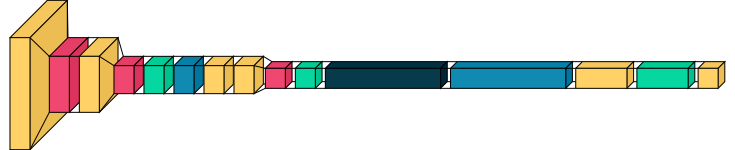

In [36]:

visualkeras.layered_view(model_fashion)

In [37]:
model_fashion.summary()
model_fashion.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

output_fashion = model_fashion.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_val, y_val))

model_fashion.save('models/model_fashion_mnist.h5')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 7, 7, 64)          0         
                                                                 
 batch_normalization_13 (Bat  (None, 7, 7, 64)       

2022-12-09 18:09:07.085069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 4.8230 - accuracy: 0.7434

2022-12-09 18:09:16.462421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 11s 179ms/step - loss: 4.8230 - accuracy: 0.7434 - val_loss: 3.1435 - val_accuracy: 0.7635
Epoch 2/100
47/47 [==============================] - 7s 154ms/step - loss: 1.1349 - accuracy: 0.8541 - val_loss: 1.5965 - val_accuracy: 0.6507
Epoch 3/100
47/47 [==============================] - 7s 153ms/step - loss: 0.4971 - accuracy: 0.8759 - val_loss: 1.1529 - val_accuracy: 0.6579
Epoch 4/100
47/47 [==============================] - 7s 154ms/step - loss: 0.4004 - accuracy: 0.8873 - val_loss: 0.8118 - val_accuracy: 0.7377
Epoch 5/100
47/47 [==============================] - 7s 152ms/step - loss: 0.3732 - accuracy: 0.8933 - val_loss: 0.6368 - val_accuracy: 0.8167
Epoch 6/100
47/47 [==============================] - 7s 152ms/step - loss: 0.3554 - accuracy: 0.9003 - val_loss: 0.5422 - val_accuracy: 0.8523
Epoch 7/100
47/47 [==============================] - 7s 153ms/step - loss: 0.3463 - accuracy: 0.9022 - val_loss: 0.4253 - val_accuracy: 0.8999
Epoch 8/10

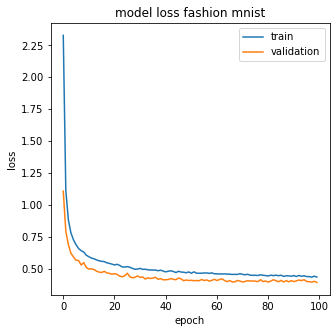

In [ ]:
model_fashion = tf.keras.models.load_model('models/model_fashion_mnist.h5')
plt.plot(output_fashion.epoch, output_fashion.history['loss'])
plt.plot(output_fashion.epoch, output_fashion.history['val_loss'])
plt.title('model loss fashion mnist')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig("training_fashion.pdf", dpi=50) #Saving the output in a pdf file.
plt.show()

The chosen index is 6939
Class:  [6]


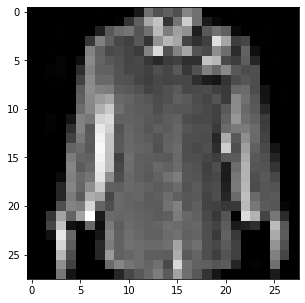

In [ ]:
# Choose a random sample from the training data
index = np.random.randint(0, len(x_train))
print("The chosen index is",index)
sample = x_train[index]

plt.imshow(sample[:,:,0])
print("Class: ", np.arange(num_classes)[y_train[index].astype('bool')])

1/1 [==============================] - 0s 94ms/step


2022-12-08 10:33:26.204624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Activations values in the first convolutional layer


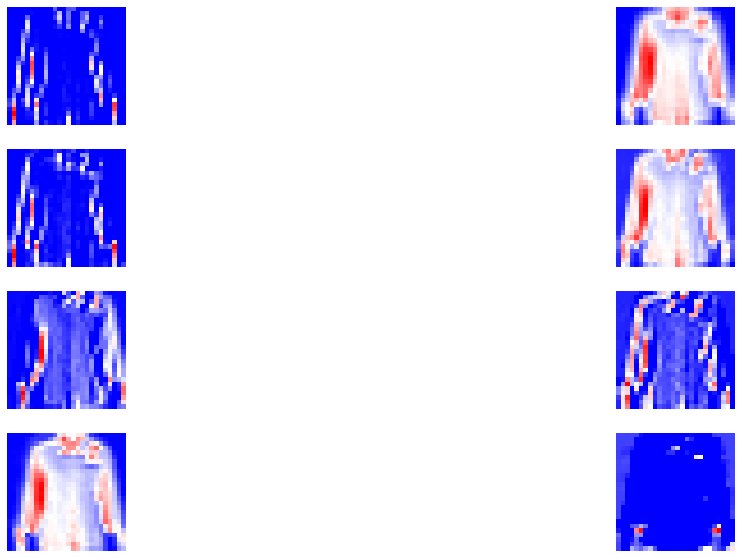

In [ ]:
from keras.models import Model
layer_outputs_fashion = [layer.output for layer in model_fashion.layers]
activation_model_fashion = Model(inputs=model_fashion.input, outputs=layer_outputs_fashion)
activations_fashion = activation_model_fashion.predict(sample.reshape(1,28,28,1))

# display activation layer of the first filter
print('Activations values in the first convolutional layer')
display_activation(activations_fashion, 2, 4, 0)

Activations values in the first convolutional layer


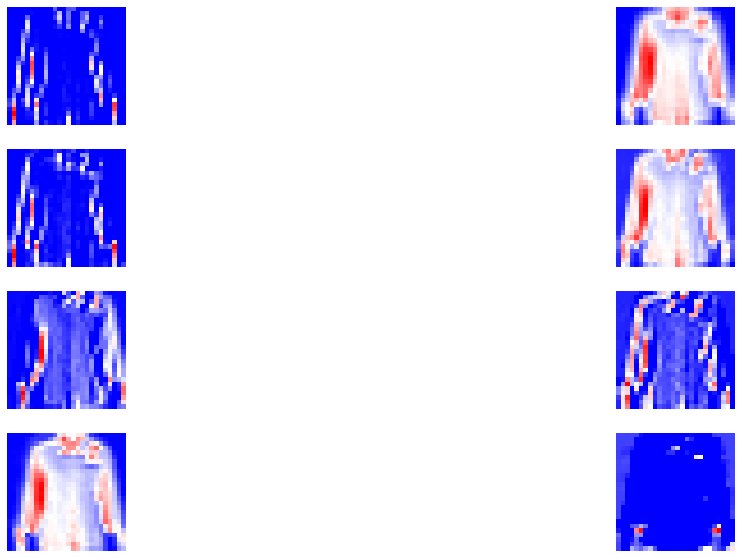

In [ ]:
# display activation layer of the first filter
print('Activations values in the first convolutional layer')
display_activation(activations_fashion, 2, 4, 0)

Activations values in the third convolutional layer


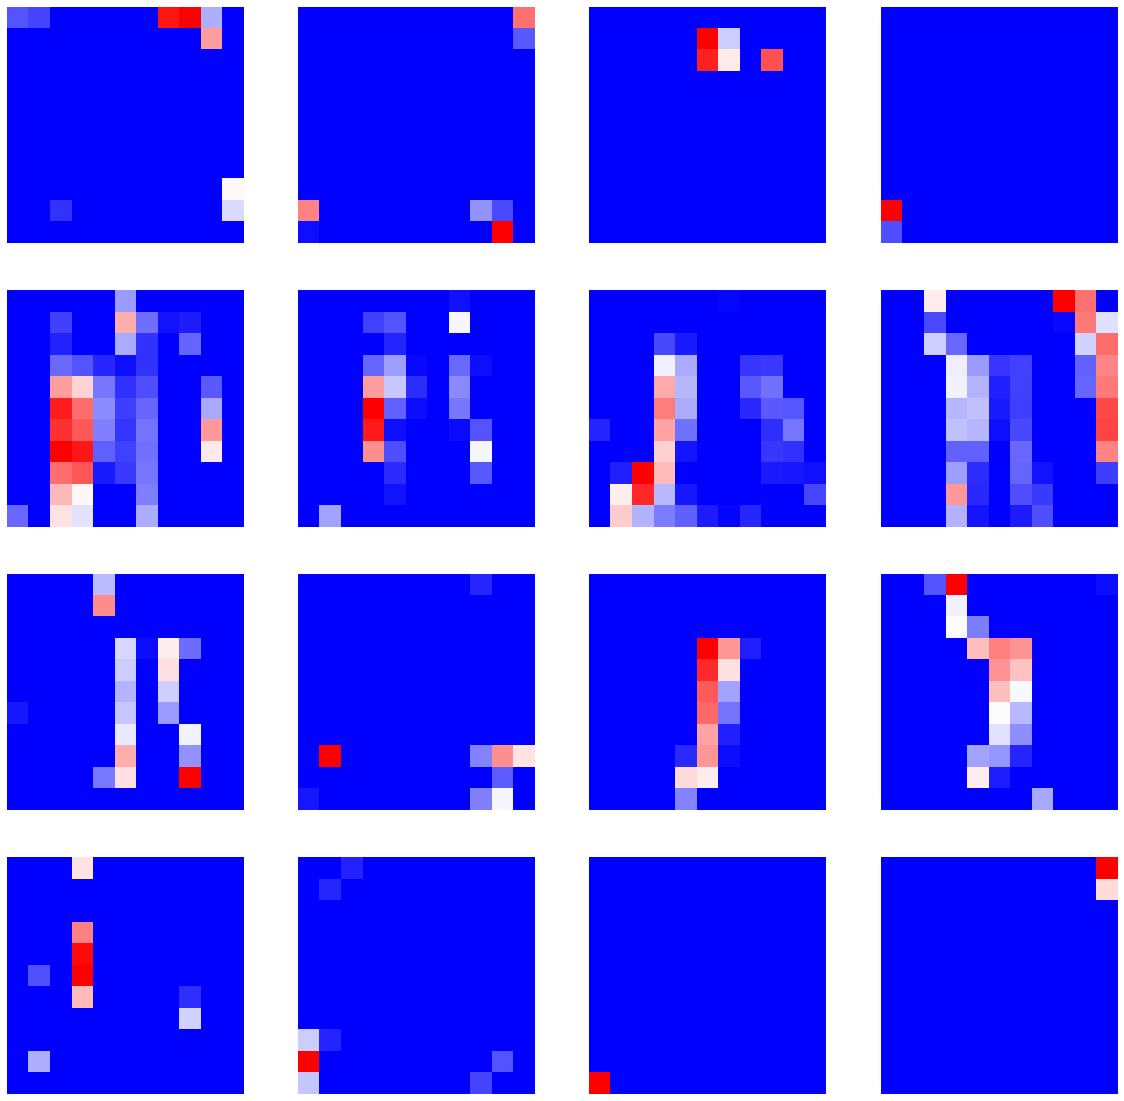

In [ ]:
# display activation filter of the second filter
print('Activations values in the third convolutional layer')
display_activation(activations_fashion, 4, 4, 2)

In [ ]:
#import accuracy_score 
from sklearn.metrics import accuracy_score
#compute accuracy for fasion mnist
y_pred_fashion = model_fashion.predict(x_test)
y_pred_fashion = np.argmax(y_pred_fashion, axis=1)
y_test_fashion = np.argmax(y_test, axis=1)
print("Accuracy on Fashion MNIST: ", accuracy_score(y_test_fashion, y_pred_fashion))
#detail accuracy for each class
from sklearn.metrics import classification_report
print(classification_report(y_test_fashion, y_pred_fashion))


 35/313 [==>...........................] - ETA: 0s

2022-12-08 10:33:27.595439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step
Accuracy on Fashion MNIST:  0.9014
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.87      0.87      1000
           3       0.87      0.93      0.90      1000
           4       0.83      0.87      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.76      0.63      0.69      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.94      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

